Plot Liquid Height in Tank Over Time during cleaning

<ipython-input-1-5c539bba144e>:13: RuntimeWarning: invalid value encountered in sqrt
  q_out = discharge_coefficient * np.sqrt(2 * 9.81 * h) * np.pi * (discharge_diameter / 2)**2


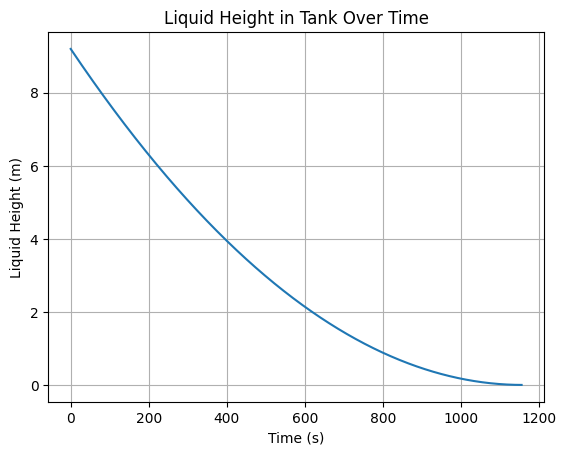

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
liquid_height = 9.2  # m
tank_diameter = 2.88  # m
discharge_diameter = 0.1  # m
discharge_coefficient = 0.98

# Function to evaluate rate of change of liquid height based on Torricelli's law
def dh_dt(h):
    # Calculate the flow rate out of the tank using Torricelli's law
    q_out = discharge_coefficient * np.sqrt(2 * 9.81 * h) * np.pi * (discharge_diameter / 2)**2

    # Calculate the cross-sectional area of the tank
    tank_area = np.pi * (tank_diameter / 2)**2

    # Calculate the rate of change of liquid height based on conservation of mass
    dh_dt = -q_out / tank_area

    return dh_dt


# Set up initial condition and time grid
h0 = liquid_height  # initial liquid height
t = np.linspace(0, 1500, 1000)  # time grid
dt = t[1] - t[0]  # time step

# Perform simulation by numerical integration (Euler's method)
sol = np.zeros_like(t)
sol[0] = h0
for i in range(1, len(t)):
    dh = dh_dt(sol[i-1])
    sol[i] = sol[i-1] + dh * dt

# Plot the results
plt.plot(t, sol)
plt.xlabel('Time (s)')
plt.ylabel('Liquid Height (m)')
plt.title('Liquid Height in Tank Over Time')
plt.grid(True)
plt.show()



Liquid Height in Tank Over Time during cleaing

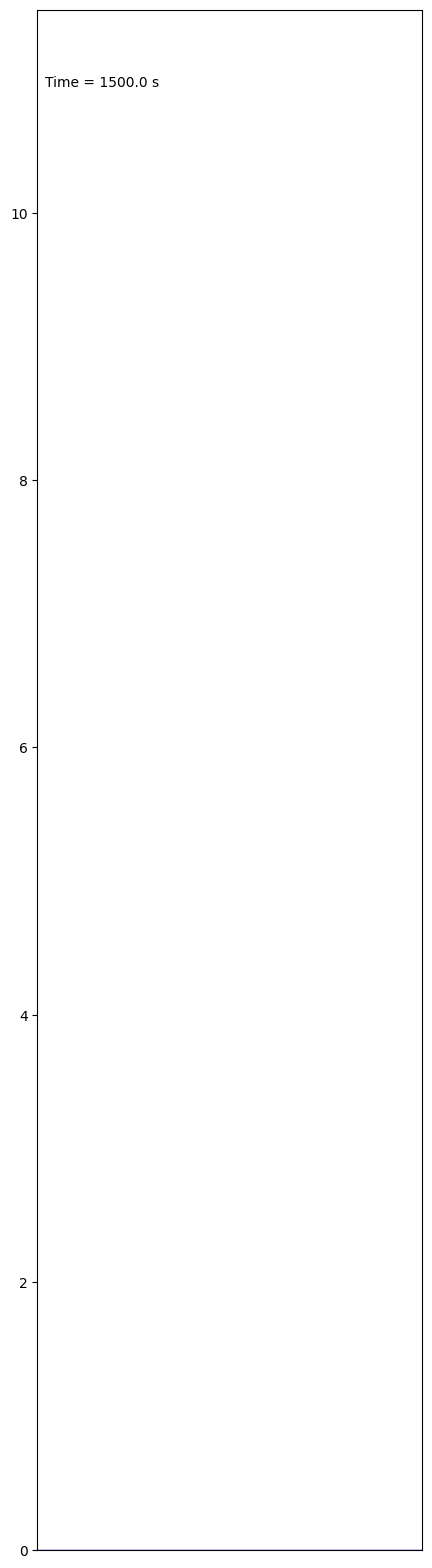

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# Define parameters
liquid_height = 9.2  # m
tank_height = 11.52  # m
tank_diameter = 2.88  # m
discharge_diameter = 0.1  # m
discharge_coefficient = 0.98

# Function to evaluate rate of change of liquid height based on Torricelli's law
def dh_dt(h):
    # Calculate the flow rate out of the tank using Torricelli's law
    q_out = discharge_coefficient * np.sqrt(2 * 9.81 * h) * np.pi * (discharge_diameter / 2)**2
    # Calculate the cross-sectional area of the tank
    tank_area = np.pi * (tank_diameter / 2)**2
    # Calculate the rate of change of liquid height based on conservation of mass
    dh_dt = -q_out / tank_area
    return dh_dt

# Set up initial condition and time grid
h0 = liquid_height  # initial liquid height
t = np.linspace(0, 1500, 1000)  # time grid
dt = t[1] - t[0]  # time step

# Perform simulation by numerical integration (Euler's method)
sol = np.zeros_like(t)
sol[0] = h0
for i in range(1, len(t)):
    dh = dh_dt(sol[i-1])
    sol[i] = sol[i-1] + dh * dt
    if sol[i] < 0:  # Ensure the height does not go negative
        sol[i] = 0
        break

# Create a figure and axis
fig, ax = plt.subplots(figsize=(5, 20))  # Adjust the figure size to make the aspect ratio more appropriate
ax.set_xlim(0, tank_diameter)  # Set x-axis limit to tank diameter
ax.set_ylim(0, tank_height)  # Set y-axis limit to 11.52 meters
ax.set_aspect('equal')  # Set the aspect ratio to be equal
ax.get_xaxis().set_ticks([])  # Remove x-axis numbers
time_text = ax.text(0.02, 0.95, '', transform=ax.transAxes)

# Initialize the background of the plot with the initial state
fill = ax.fill_between([0, tank_diameter], 0, sol[0], color='blue')

# Function to update the animation
def animate(frame):
    global fill  # Declare 'fill' as global variable
    fill.remove()  # Remove previous fill
    fill = ax.fill_between([0, tank_diameter], 0, sol[frame], color='blue')  # Update fill
    time_text.set_text('Time = %.1f s' % t[frame])
    return fill, time_text

# Create the animation
ani = FuncAnimation(fig, animate, frames=len(t), init_func=init, interval=20, blit=True, repeat=False)

# Display the animation in a Jupyter notebook
HTML(ani.to_html5_video())



Liquid Height in Tank Over Time during discharge

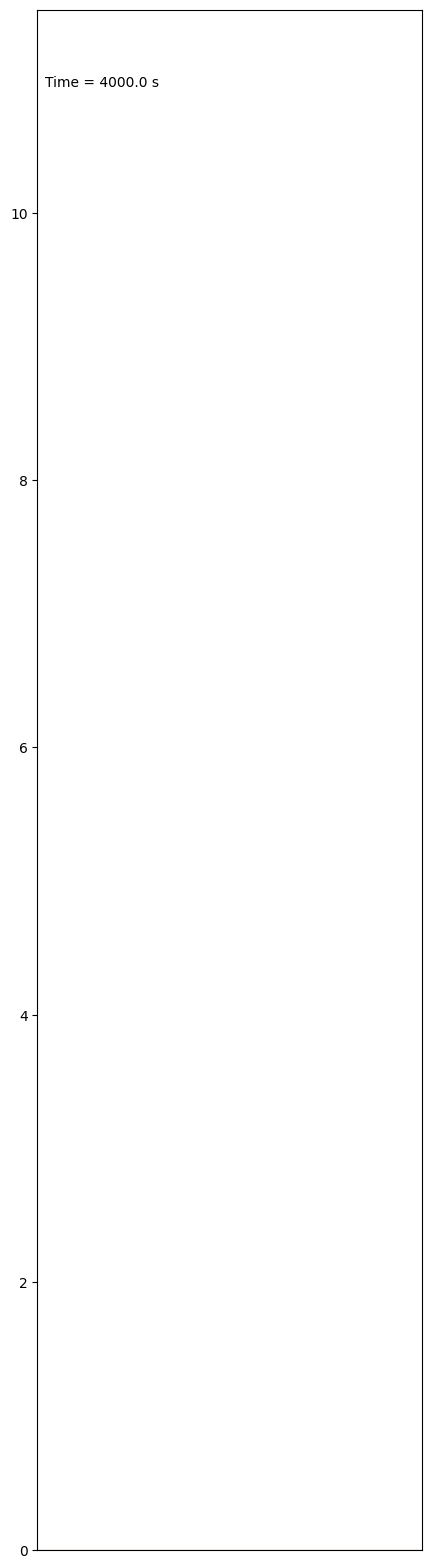

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# Define parameters
liquid_height = 9.2  # m
tank_height = 11.52  # m
tank_diameter = 2.88  # m
outflow_rate = 56.25 / 3600  # m³/s (convert from m³/h to m³/s)

# Function to evaluate rate of change of liquid height with constant outflow
def dh_dt():
    # Calculate the cross-sectional area of the tank
    tank_area = np.pi * (tank_diameter / 2)**2
    # Calculate the rate of change of liquid height based on conservation of mass
    dh_dt = -outflow_rate / tank_area
    return dh_dt

# Set up initial condition and time grid
h0 = liquid_height  # initial liquid height
t = np.linspace(0, 4000, 1000)  # time grid (up to 1 hour for more resolution)
dt = t[1] - t[0]  # time step

# Perform simulation by numerical integration (Euler's method)
sol = np.zeros_like(t)
sol[0] = h0
for i in range(1, len(t)):
    dh = dh_dt()
    sol[i] = sol[i-1] + dh * dt
    if sol[i] < 0:  # Ensure the height does not go negative
        sol[i] = 0
        break

# Create a figure and axis
fig, ax = plt.subplots(figsize=(5, 20))  # Adjust the figure size to make the aspect ratio more appropriate
ax.set_xlim(0, tank_diameter)  # Set x-axis limit to tank diameter
ax.set_ylim(0, tank_height)  # Set y-axis limit to tank height
ax.set_aspect('equal')  # Set the aspect ratio to be equal
ax.get_xaxis().set_ticks([])  # Remove x-axis numbers
time_text = ax.text(0.02, 0.95, '', transform=ax.transAxes)

# Initialize the background of the plot with the initial state
fill = ax.fill_between([0, tank_diameter], 0, sol[0], color='#D2B48C')

# Function to update the animation
def animate(frame):
    global fill  # Declare 'fill' as global variable
    fill.remove()  # Remove previous fill
    fill = ax.fill_between([0, tank_diameter], 0, sol[frame], color='#D2B48C')  # Update fill
    time_text.set_text('Time = %.1f s' % t[frame])
    return fill, time_text

# Create the animation
ani = FuncAnimation(fig, animate, frames=len(t), init_func=init, interval=20, blit=True, repeat=False)

# Display the animation in a Jupyter notebook
HTML(ani.to_html5_video())




Two tanks: first one discharging to the second

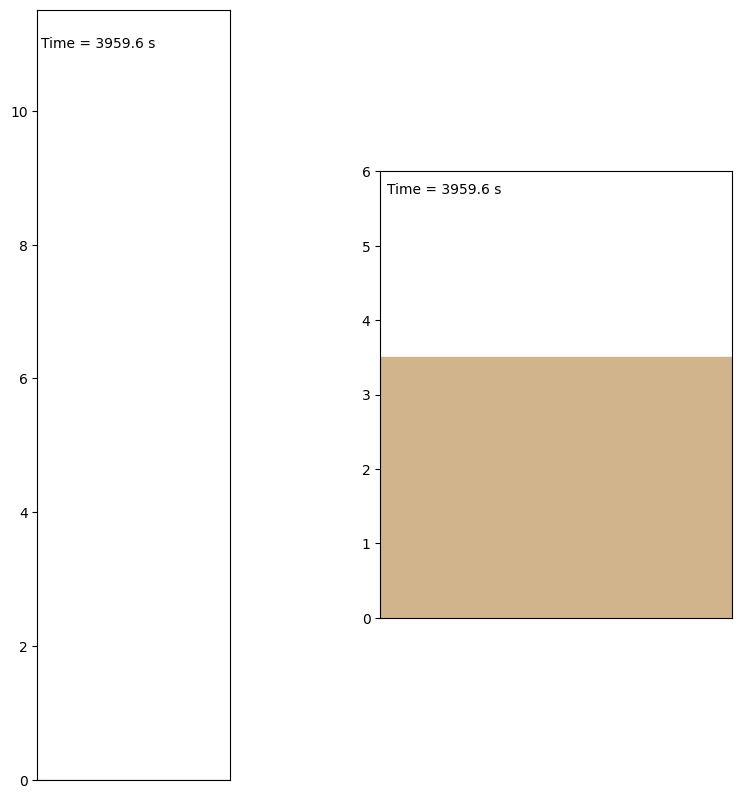

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# Define parameters for the first tank
liquid_height_1 = 9.2  # m
tank_height_1 = 11.52  # m
tank_diameter_1 = 2.88  # m
outflow_rate_1 = 56 / 3600  # m³/s (convert from m³/h to m³/s)

# Define parameters for the second tank
liquid_height_2 = 0  # m (initial)
tank_height_2 = 6  # m
tank_diameter_2 = 4.73  # m
inflow_rate_2 = outflow_rate_1  # m³/s (same as outflow of the first tank)

# Function to evaluate rate of change of liquid height in the first tank with constant outflow
def dh_dt_1(h):
    # Calculate the cross-sectional area of the tank
    tank_area_1 = np.pi * (tank_diameter_1 / 2)**2
    # Calculate the rate of change of liquid height based on conservation of mass
    dh_dt_1 = -outflow_rate_1 / tank_area_1
    return dh_dt_1

# Function to evaluate rate of change of liquid height in the second tank with constant inflow
def dh_dt_2(h):
    # Calculate the cross-sectional area of the tank
    tank_area_2 = np.pi * (tank_diameter_2 / 2)**2
    # Calculate the rate of change of liquid height based on conservation of mass
    dh_dt_2 = inflow_rate_2 / tank_area_2
    return dh_dt_2

# Set up initial conditions and time grid
h0_1 = liquid_height_1  # initial liquid height in tank 1
h0_2 = liquid_height_2  # initial liquid height in tank 2
t = np.linspace(0, 4000, 100)  # time grid (up to 1 hour for more resolution)
dt = t[1] - t[0]  # time step

# Perform simulation by numerical integration (Euler's method) for the first tank
sol_1 = np.zeros_like(t)
sol_1[0] = h0_1
for i in range(1, len(t)):
    dh = dh_dt_1(sol_1[i-1])
    sol_1[i] = sol_1[i-1] + dh * dt
    if sol_1[i] < 0:  # Ensure the height does not go negative
        sol_1[i] = 0
        break

# Perform simulation by numerical integration (Euler's method) for the second tank
sol_2 = np.zeros_like(t)
sol_2[0] = h0_2
for i in range(1, len(t)):
    dh = dh_dt_2(sol_2[i-1])
    sol_2[i] = sol_2[i-1] + dh * dt
    if sol_2[i] > tank_height_2:  # Ensure the height does not exceed the tank height
        sol_2[i] = tank_height_2

# Create a figure and axes for both tanks
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 10))  # Adjust the figure size for two tanks

# Set axis properties for the first tank
ax1.set_xlim(0, tank_diameter_1)  # Set x-axis limit to tank diameter
ax1.set_ylim(0, tank_height_1)  # Set y-axis limit to tank height
ax1.set_aspect('equal')  # Set the aspect ratio to be equal
ax1.get_xaxis().set_ticks([])  # Remove x-axis numbers
time_text_1 = ax1.text(0.02, 0.95, '', transform=ax1.transAxes)

# Set axis properties for the second tank
ax2.set_xlim(0, tank_diameter_2)  # Set x-axis limit to tank diameter
ax2.set_ylim(0, tank_height_2)  # Set y-axis limit to tank height
ax2.set_aspect('equal')  # Set the aspect ratio to be equal
ax2.get_xaxis().set_ticks([])  # Remove x-axis numbers
time_text_2 = ax2.text(0.02, 0.95, '', transform=ax2.transAxes)

# Initialize the background of the plot with the initial state
fill_1 = ax1.fill_between([0, tank_diameter_1], 0, sol_1[0], color='#D2B48C')
fill_2 = ax2.fill_between([0, tank_diameter_2], 0, sol_2[0], color='#D2B48C')

# Function to update the animation
def animate(frame):
    global fill_1, fill_2  # Declare 'fill' as global variable
    fill_1.remove()  # Remove previous fill for tank 1
    fill_2.remove()  # Remove previous fill for tank 2
    fill_1 = ax1.fill_between([0, tank_diameter_1], 0, sol_1[frame], color='#D2B48C')  # Update fill for tank 1
    fill_2 = ax2.fill_between([0, tank_diameter_2], 0, sol_2[frame], color='#D2B48C')  # Update fill for tank 2
    time_text_1.set_text('Time = %.1f s' % t[frame])
    time_text_2.set_text('Time = %.1f s' % t[frame])
    return fill_1, fill_2, time_text_1, time_text_2

# Create the animation
ani = FuncAnimation(fig, animate, frames=len(t)-1, init_func=init, interval=20, blit=True, repeat=False)

# Display the animation in a Jupyter notebook
HTML(ani.to_html5_video())


Two tank: the first is discharging to the second and the second is discharging at constant flow rate

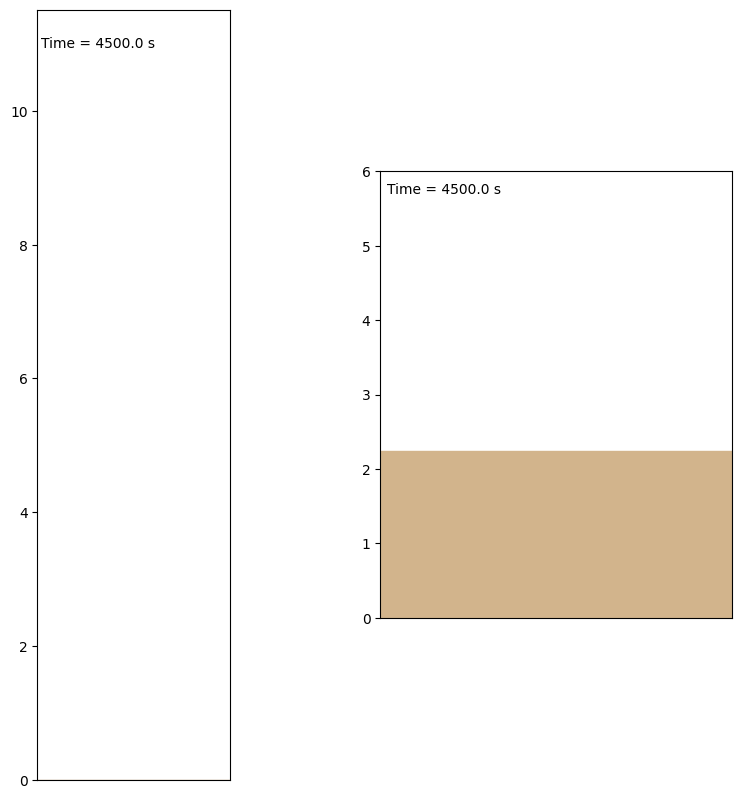

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# Define parameters for the first tank
liquid_height_1 = 9.2  # m
tank_height_1 = 11.52  # m
tank_diameter_1 = 2.88  # m
outflow_rate_1 = 56 / 3600  # m³/s (convert from m³/h to m³/s)

# Define parameters for the second tank
liquid_height_2 = 0  # m (initial)
tank_height_2 = 6  # m
tank_diameter_2 = 4.73  # m
outflow_rate_2 = 16 / 3600  # m³/s (convert from m³/h to m³/s)

# Function to evaluate rate of change of liquid height in the first tank with constant outflow
def dh_dt_1(h):
    # Calculate the cross-sectional area of the tank
    tank_area_1 = np.pi * (tank_diameter_1 / 2)**2
    # Calculate the rate of change of liquid height based on conservation of mass
    dh_dt_1 = -outflow_rate_1 / tank_area_1
    return dh_dt_1

# Function to evaluate rate of change of liquid height in the second tank with constant inflow and outflow
def dh_dt_2(h, inflow_rate):
    # Calculate the cross-sectional area of the tank
    tank_area_2 = np.pi * (tank_diameter_2 / 2)**2
    # Calculate the net flow rate (inflow - outflow)
    net_flow_rate = inflow_rate - outflow_rate_2
    # Calculate the rate of change of liquid height based on conservation of mass
    dh_dt_2 = net_flow_rate / tank_area_2
    return dh_dt_2

# Set up initial conditions and time grid
h0_1 = liquid_height_1  # initial liquid height in tank 1
h0_2 = liquid_height_2  # initial liquid height in tank 2
t = np.linspace(0, 4500, 100)  # time grid (up to 1 hour for more resolution)
dt = t[1] - t[0]  # time step

# Perform simulation by numerical integration (Euler's method) for the first tank
sol_1 = np.zeros_like(t)
sol_1[0] = h0_1
empty_time_index = len(t)  # Assume the tank does not empty within the time grid initially

for i in range(1, len(t)):
    dh = dh_dt_1(sol_1[i-1])
    sol_1[i] = sol_1[i-1] + dh * dt
    if sol_1[i] < 0:  # Ensure the height does not go negative
        sol_1[i] = 0
        empty_time_index = i  # Record the index when the first tank becomes empty
        break

# Perform simulation by numerical integration (Euler's method) for the second tank
sol_2 = np.zeros_like(t)
sol_2[0] = h0_2

for i in range(1, len(t)):
    if i >= empty_time_index:
        inflow_rate_2 = 0  # Stop inflow if the first tank is empty
    else:
        inflow_rate_2 = outflow_rate_1  # Otherwise, inflow equals outflow of the first tank

    dh = dh_dt_2(sol_2[i-1], inflow_rate_2)
    sol_2[i] = sol_2[i-1] + dh * dt
    if sol_2[i] < 0:  # Ensure the height does not go negative
        sol_2[i] = 0

# Create a figure and axes for both tanks
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 10))  # Adjust the figure size for two tanks

# Set axis properties for the first tank
ax1.set_xlim(0, tank_diameter_1)  # Set x-axis limit to tank diameter
ax1.set_ylim(0, tank_height_1)  # Set y-axis limit to tank height
ax1.set_aspect('equal')  # Set the aspect ratio to be equal
ax1.get_xaxis().set_ticks([])  # Remove x-axis numbers
time_text_1 = ax1.text(0.02, 0.95, '', transform=ax1.transAxes)

# Set axis properties for the second tank
ax2.set_xlim(0, tank_diameter_2)  # Set x-axis limit to tank diameter
ax2.set_ylim(0, tank_height_2)  # Set y-axis limit to tank height
ax2.set_aspect('equal')  # Set the aspect ratio to be equal
ax2.get_xaxis().set_ticks([])  # Remove x-axis numbers
time_text_2 = ax2.text(0.02, 0.95, '', transform=ax2.transAxes)

# Initialize the background of the plot with the initial state
fill_1 = ax1.fill_between([0, tank_diameter_1], 0, sol_1[0], color='#D2B48C')
fill_2 = ax2.fill_between([0, tank_diameter_2], 0, sol_2[0], color='#D2B48C')

# Function to update the animation
def animate(frame):
    global fill_1, fill_2  # Declare 'fill' as global variable
    fill_1.remove()  # Remove previous fill for tank 1
    fill_2.remove()  # Remove previous fill for tank 2
    fill_1 = ax1.fill_between([0, tank_diameter_1], 0, sol_1[frame], color='#D2B48C')  # Update fill for tank 1
    fill_2 = ax2.fill_between([0, tank_diameter_2], 0, sol_2[frame], color='#D2B48C')  # Update fill for tank 2
    time_text_1.set_text('Time = %.1f s' % t[frame])
    time_text_2.set_text('Time = %.1f s' % t[frame])
    return fill_1, fill_2, time_text_1, time_text_2

# Create the animation
ani = FuncAnimation(fig, animate, frames=len(t), init_func=init, interval=20, blit=True, repeat=False)

# Display the animation in a Jupyter notebook
HTML(ani.to_html5_video())


Three tanks: two discharging to another

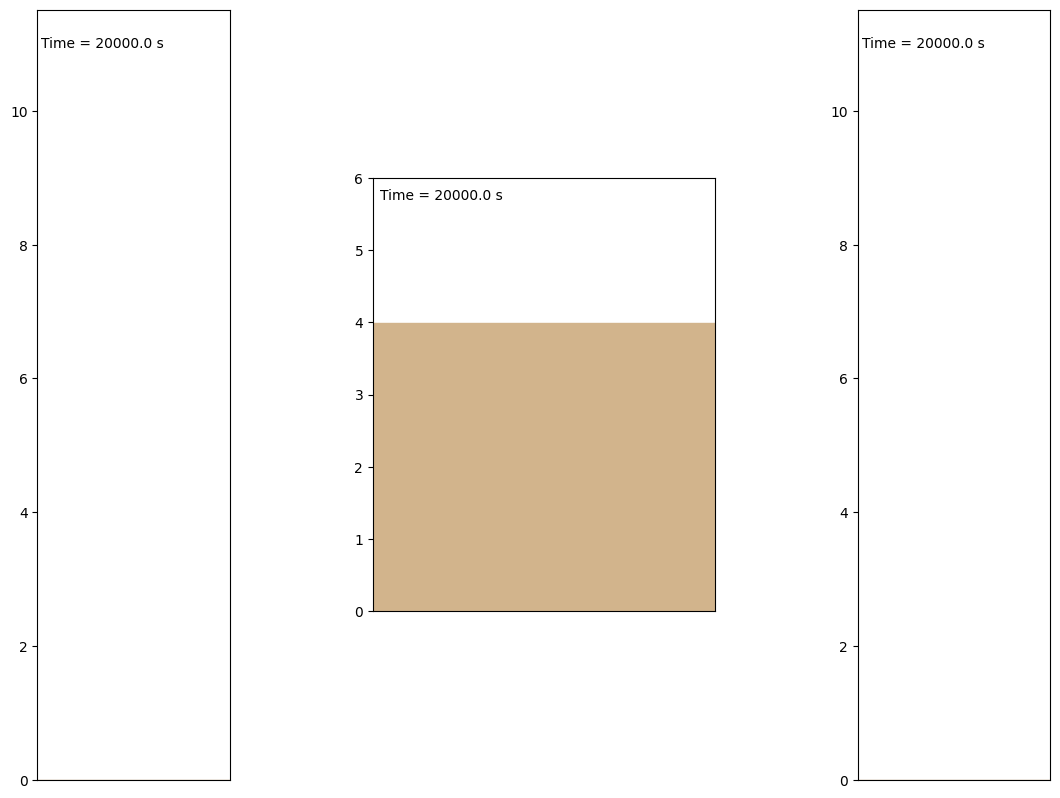

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# Define parameters for the first and third tanks
liquid_height_1_3 = 9.2  # m
tank_height_1_3 = 11.52  # m
tank_diameter_1_3 = 2.88  # m
outflow_rate_1_3 = 56 / 3600  # m³/s (convert from m³/h to m³/s)

# Define parameters for the second tank
liquid_height_2 = 0  # m (initial)
tank_height_2 = 6  # m
tank_diameter_2 = 4.73  # m
outflow_rate_2_default = 16 / 3600  # m³/s (convert from m³/h to m³/s)
start_time_centrifuge = 2.5*3600 # s

# Function to evaluate rate of change of liquid height in the first and third tanks with constant outflow
def dh_dt_1_3(h):
    # Calculate the cross-sectional area of the tank
    tank_area_1_3 = np.pi * (tank_diameter_1_3 / 2)**2
    # Calculate the rate of change of liquid height based on conservation of mass
    dh_dt_1_3 = -outflow_rate_1_3 / tank_area_1_3
    return dh_dt_1_3

# Function to evaluate rate of change of liquid height in the second tank with varying inflow and outflow rates
def dh_dt_2(h, inflow_rate, outflow_rate):
    # Calculate the cross-sectional area of the tank
    tank_area_2 = np.pi * (tank_diameter_2 / 2)**2
    # Calculate the net flow rate (inflow - outflow)
    net_flow_rate = inflow_rate - outflow_rate
    # Calculate the rate of change of liquid height based on conservation of mass
    dh_dt_2 = net_flow_rate / tank_area_2
    return dh_dt_2

# Set up initial conditions and time grid
h0_1 = liquid_height_1_3  # initial liquid height in tank 1
h0_3 = liquid_height_1_3  # initial liquid height in tank 3
h0_2 = liquid_height_2  # initial liquid height in tank 2
t = np.linspace(0, 20000, 100)  # time grid (up to 1 hour for more resolution)
dt = t[1] - t[0]  # time step

# Perform simulation by numerical integration (Euler's method) for the first tank
sol_1 = np.zeros_like(t)
sol_1[0] = h0_1
empty_time_index_1 = len(t)  # Assume the tank does not empty within the time grid initially

for i in range(1, len(t)):
    dh = dh_dt_1_3(sol_1[i-1])
    sol_1[i] = sol_1[i-1] + dh * dt
    if sol_1[i] < 0:  # Ensure the height does not go negative
        sol_1[i] = 0
        empty_time_index_1 = i  # Record the index when the first tank becomes empty
        break

# Perform simulation by numerical integration (Euler's method) for the third tank
sol_3 = np.zeros_like(t)
sol_3[0] = h0_3

for i in range(1, len(t)):
    if t[i] >= 12450:  # Start emptying the third tank after 3.4375 hours
        dh = dh_dt_1_3(sol_3[i-1])  # Use the outflow rate for the third tank
    else:
        dh = 0  # Keep the liquid height constant until 3.4375 hours

    sol_3[i] = sol_3[i-1] + dh * dt
    if sol_3[i] < 0:  # Ensure the height does not go negative
        sol_3[i] = 0

# Calculate the time at which the first tank becomes empty
empty_time_index_1 = np.argmax(sol_1 <= 0)
empty_time_1 = t[empty_time_index_1]

# Calculate the time at which the third tank becomes empty
empty_time_index_3 = np.argmax(sol_3 <= 0)
empty_time_3 = t[empty_time_index_3]

# Perform simulation by numerical integration (Euler's method) for the second tank
sol_2 = np.zeros_like(t)
sol_2[0] = h0_2

for i in range(1, len(t)):
    if t[i] < empty_time_1:  # Before the first tank becomes empty
        inflow_rate_2 = outflow_rate_1_3  # Inflow rate is the outflow rate from tanks 1 and 3
    elif empty_time_1 <= t[i] < empty_time_3:  # Between the first and third tank becoming empty
        inflow_rate_2 = 0  # No inflow into the second tank
    else:  # After the third tank becomes empty
        inflow_rate_2 = outflow_rate_1_3  # Inflow rate is the outflow rate from tanks 1 and 3

    if t[i] < start_time_centrifuge:  # Before 2.5 hours
        outflow_rate_2 = 0  # No outflow from the second tank
    else:  # After 2.5 hours
        outflow_rate_2 = outflow_rate_2_default  # Maintain the original outflow rate

    dh = dh_dt_2(sol_2[i-1], inflow_rate_2, outflow_rate_2)
    sol_2[i] = sol_2[i-1] + dh * dt
    if sol_2[i] < 0:  # Ensure the height does not go negative
        sol_2[i] = 0


# Create a figure and axes for the three tanks
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 10))  # Adjust the figure size for three tanks

# Set axis properties for the first tank
ax1.set_xlim(0, tank_diameter_1_3)  # Set x-axis limit to tank diameter
ax1.set_ylim(0, tank_height_1_3)  # Set y-axis limit to tank height
ax1.set_aspect('equal')  # Set the aspect ratio to be equal
ax1.get_xaxis().set_ticks([])  # Remove x-axis numbers
time_text_1 = ax1.text(0.02, 0.95, '', transform=ax1.transAxes)

# Set axis properties for the second tank
ax2.set_xlim(0, tank_diameter_2)  # Set x-axis limit to tank diameter
ax2.set_ylim(0, tank_height_2)  # Set y-axis limit to tank height
ax2.set_aspect('equal')  # Set the aspect ratio to be equal
ax2.get_xaxis().set_ticks([])  # Remove x-axis numbers
time_text_2 = ax2.text(0.02, 0.95, '', transform=ax2.transAxes)

# Set axis properties for the third tank
ax3.set_xlim(0, tank_diameter_1_3)  # Set x-axis limit to tank diameter
ax3.set_ylim(0, tank_height_1_3)  # Set y-axis limit to tank height
ax3.set_aspect('equal')  # Set the aspect ratio to be equal
ax3.get_xaxis().set_ticks([])  # Remove x-axis numbers
time_text_3 = ax3.text(0.02, 0.95, '', transform=ax3.transAxes)

# Initialize the background of the plots with the initial states
fill_1 = ax1.fill_between([0, tank_diameter_1_3], 0, sol_1[0], color='#D2B48C')  # First tank (yellowish brown)
fill_2 = ax2.fill_between([0, tank_diameter_2], 0, sol_2[0], color='#D2B48C')  # Second tank (yellowish brown)
fill_3 = ax3.fill_between([0, tank_diameter_1_3], 0, sol_3[0], color='#D2B48C')  # Third tank (yellowish brown)

# Function to update the animation
def animate(frame):
    global fill_1, fill_2, fill_3  # Declare fills as global variables
    fill_1.remove()  # Remove previous fill for the first tank
    fill_2.remove()  # Remove previous fill for the second tank
    fill_3.remove()  # Remove previous fill for the third tank

    # Update fill for the first tank
    fill_1 = ax1.fill_between([0, tank_diameter_1_3], 0, sol_1[frame], color='#D2B48C')  # First tank (yellowish brown)

    # Update fill for the second tank
    fill_2 = ax2.fill_between([0, tank_diameter_2], 0, sol_2[frame], color='#D2B48C')  # Second tank (yellowish brown)

    # Update fill for the third tank only after 3.4375 hours (12450 seconds)
    if t[frame] >= 12450:
        fill_3 = ax3.fill_between([0, tank_diameter_1_3], 0, sol_3[frame], color='#D2B48C')  # Third tank (yellowish brown)
    else:
        fill_3 = ax3.fill_between([0, tank_diameter_1_3], 0, liquid_height_1_3, color='#D2B48C')  # Third tank remains full

    # Update time text for all tanks
    time_text_1.set_text('Time = %.1f s' % t[frame])
    time_text_2.set_text('Time = %.1f s' % t[frame])
    time_text_3.set_text('Time = %.1f s' % t[frame])

    return fill_1, fill_2, fill_3, time_text_1, time_text_2, time_text_3

# Initialize the plot with the first frame (this prevents showing the last frame initially)
def init():
    global fill_1, fill_2, fill_3
    fill_1.remove()
    fill_2.remove()
    fill_3.remove()
    fill_1 = ax1.fill_between([0, tank_diameter_1_3], 0, sol_1[0], color='#D2B48C')
    fill_2 = ax2.fill_between([0, tank_diameter_2], 0, sol_2[0], color='#D2B48C')
    fill_3 = ax3.fill_between([0, tank_diameter_1_3], 0, sol_3[0], color='#D2B48C')
    time_text_1.set_text('')
    time_text_2.set_text('')
    time_text_3.set_text('')
    return fill_1, fill_2, fill_3, time_text_1, time_text_2, time_text_3

# Create the animation
ani = FuncAnimation(fig, animate, frames=len(t), init_func=init, interval=20, blit=True, repeat=False)

# Display the animation in a Jupyter notebook
HTML(ani.to_html5_video())




Three tanks: two discharge to another with centrifuges delay

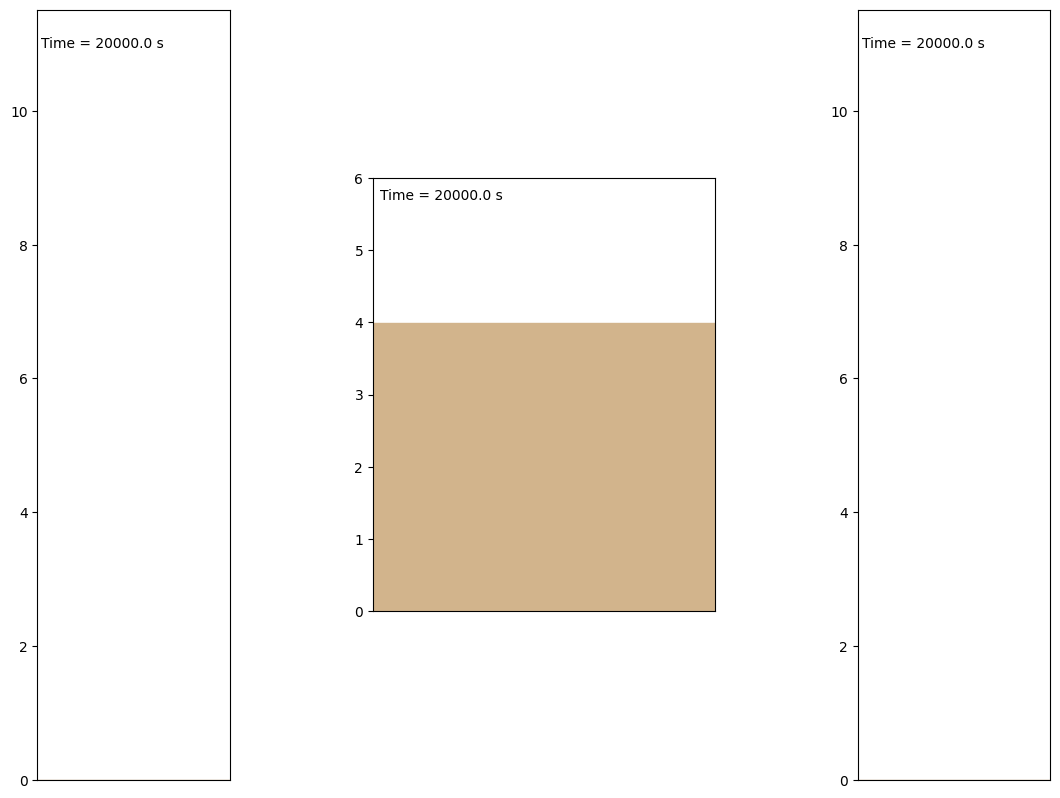

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# Define parameters for the first and third tanks (Reactors 1 and 2)
liquid_height_reactor1 = 9.2  # m
tank_height_reactor1 = 11.52  # m
tank_diameter_reactor1 = 2.88  # m
outflow_rate_reactor1 = 56 / 3600  # m³/s (convert from m³/h to m³/s)

# Define parameters for the storage tank (Reactor 3)
liquid_height_storage = 0  # m (initial)
tank_height_storage = 6  # m
tank_diameter_storage = 4.73  # m
outflow_rate_storage_default = 16 / 3600  # m³/s (convert from m³/h to m³/s)
start_time_centrifuge = 2.5 * 3600  # s

# Function to evaluate rate of change of liquid height in Reactors 1 and 2 with constant outflow
def dh_dt_reactor1(h):
    # Calculate the cross-sectional area of the tank
    tank_area_reactor1 = np.pi * (tank_diameter_reactor1 / 2) ** 2
    # Calculate the rate of change of liquid height based on conservation of mass
    dh_dt_reactor1 = -outflow_rate_reactor1 / tank_area_reactor1
    return dh_dt_reactor1

# Function to evaluate rate of change of liquid height in the storage tank (Reactor 3) with varying inflow and outflow rates
def dh_dt_storage(h, inflow_rate, outflow_rate):
    # Calculate the cross-sectional area of the tank
    tank_area_storage = np.pi * (tank_diameter_storage / 2) ** 2
    # Calculate the net flow rate (inflow - outflow)
    net_flow_rate = inflow_rate - outflow_rate
    # Calculate the rate of change of liquid height based on conservation of mass
    dh_dt_storage = net_flow_rate / tank_area_storage
    return dh_dt_storage

# Set up initial conditions and time grid
h0_reactor1 = liquid_height_reactor1  # initial liquid height in Reactor 1
h0_reactor2 = liquid_height_reactor1  # initial liquid height in Reactor 2
h0_storage = liquid_height_storage  # initial liquid height in the storage tank
t = np.linspace(0, 20000, 100)  # time grid (up to 1 hour for more resolution)
dt = t[1] - t[0]  # time step

# Perform simulation by numerical integration (Euler's method) for Reactor 1
sol_reactor1 = np.zeros_like(t)
sol_reactor1[0] = h0_reactor1
empty_time_index_reactor1 = len(t)  # Assume the reactor does not empty within the time grid initially

for i in range(1, len(t)):
    dh = dh_dt_reactor1(sol_reactor1[i - 1])
    sol_reactor1[i] = sol_reactor1[i - 1] + dh * dt
    if sol_reactor1[i] < 0:  # Ensure the height does not go negative
        sol_reactor1[i] = 0
        empty_time_index_reactor1 = i  # Record the index when Reactor 1 becomes empty
        break

# Perform simulation by numerical integration (Euler's method) for Reactor 2
sol_reactor2 = np.zeros_like(t)
sol_reactor2[0] = h0_reactor2

for i in range(1, len(t)):
    if t[i] >= 12450:  # Start emptying Reactor 2 after 3.4375 hours
        dh = dh_dt_reactor1(sol_reactor2[i - 1])  # Use the outflow rate for Reactor 2
    else:
        dh = 0  # Keep the liquid height constant until 3.4375 hours

    sol_reactor2[i] = sol_reactor2[i - 1] + dh * dt
    if sol_reactor2[i] < 0:  # Ensure the height does not go negative
        sol_reactor2[i] = 0

# Calculate the time at which Reactor 1 becomes empty
empty_time_index_reactor1 = np.argmax(sol_reactor1 <= 0)
empty_time_reactor1 = t[empty_time_index_reactor1]

# Calculate the time at which Reactor 2 becomes empty
empty_time_index_reactor2 = np.argmax(sol_reactor2 <= 0)
empty_time_reactor2 = t[empty_time_index_reactor2]

# Perform simulation by numerical integration (Euler's method) for the storage tank (Reactor 3)
sol_storage = np.zeros_like(t)
sol_storage[0] = h0_storage

for i in range(1, len(t)):
    if t[i] < empty_time_reactor1:  # Before Reactor 1 becomes empty
        inflow_rate_storage = outflow_rate_reactor1  # Inflow rate is the outflow rate from Reactors 1 and 2
    elif empty_time_reactor1 <= t[i] < empty_time_reactor2:  # Between Reactor 1 and Reactor 2 becoming empty
        inflow_rate_storage = 0  # No inflow into the storage tank
    else:  # After Reactor 2 becomes empty
        inflow_rate_storage = outflow_rate_reactor1  # Inflow rate is the outflow rate from Reactors 1 and 2

    if t[i] < start_time_centrifuge:  # Before 2.5 hours
        outflow_rate_storage = 0  # No outflow from the storage tank
    else:  # After 2.5 hours
        outflow_rate_storage = outflow_rate_storage_default  # Maintain the original outflow rate

    dh = dh_dt_storage(sol_storage[i - 1], inflow_rate_storage, outflow_rate_storage)
    sol_storage[i] = sol_storage[i - 1] + dh * dt
    if sol_storage[i] < 0:  # Ensure the height does not go negative
        sol_storage[i] = 0

# Create a figure and axes for the three tanks
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 10))  # Adjust the figure size for three tanks

# Set axis properties for Reactor 1
ax1.set_xlim(0, tank_diameter_reactor1)  # Set x-axis limit to tank diameter
ax1.set_ylim(0, tank_height_reactor1)  # Set y-axis limit to tank height
ax1.set_aspect('equal')  # Set the aspect ratio to be equal
ax1.get_xaxis().set_ticks([])  # Remove x-axis numbers
time_text_1 = ax1.text(0.02, 0.95, '', transform=ax1.transAxes)  # Text for displaying time

# Set axis properties for the storage tank (Reactor 3)
ax2.set_xlim(0, tank_diameter_storage)  # Set x-axis limit to tank diameter
ax2.set_ylim(0, tank_height_storage)  # Set y-axis limit to tank height
ax2.set_aspect('equal')  # Set the aspect ratio to be equal
ax2.get_xaxis().set_ticks([])  # Remove x-axis numbers
time_text_2 = ax2.text(0.02, 0.95, '', transform=ax2.transAxes)  # Text for displaying time

# Set axis properties for Reactor 2
ax3.set_xlim(0, tank_diameter_reactor1)  # Set x-axis limit to tank diameter
ax3.set_ylim(0, tank_height_reactor1)  # Set y-axis limit to tank height
ax3.set_aspect('equal')  # Set the aspect ratio to be equal
ax3.get_xaxis().set_ticks([])  # Remove x-axis numbers
time_text_3 = ax3.text(0.02, 0.95, '', transform=ax3.transAxes)  # Text for displaying time

# Initialize the background of the plots with the initial states
fill_1 = ax1.fill_between([0, tank_diameter_reactor1], 0, sol_reactor1[0], color='#D2B48C')  # Reactor 1 (yellowish brown)
fill_2 = ax2.fill_between([0, tank_diameter_storage], 0, sol_storage[0], color='#D2B48C')  # Reactor 3 (yellowish brown)
fill_3 = ax3.fill_between([0, tank_diameter_reactor1], 0, sol_reactor2[0], color='#D2B48C')  # Reactor 2 (yellowish brown)

# Function to update the animation
def animate(frame):
    global fill_1, fill_2, fill_3  # Declare fills as global variables
    fill_1.remove()  # Remove previous fill for Reactor 1
    fill_2.remove()  # Remove previous fill for Reactor 3
    fill_3.remove()  # Remove previous fill for Reactor 2

    # Update fill for Reactor 1
    fill_1 = ax1.fill_between([0, tank_diameter_reactor1], 0, sol_reactor1[frame], color='#D2B48C')  # Reactor 1 (yellowish brown)

    # Update fill for Reactor 3
    fill_2 = ax2.fill_between([0, tank_diameter_storage], 0, sol_storage[frame], color='#D2B48C')  # Reactor 3 (yellowish brown)

    # Update fill for Reactor 2
    if t[frame] >= 12450:
        fill_3 = ax3.fill_between([0, tank_diameter_reactor1], 0, sol_reactor2[frame], color='#D2B48C')  # Reactor 2 (yellowish brown)
    else:
        fill_3 = ax3.fill_between([0, tank_diameter_reactor1], 0, liquid_height_reactor1, color='#D2B48C')  # Reactor 2 remains full

    # Update time text for all tanks
    time_text_1.set_text('Time = %.1f s' % t[frame])
    time_text_2.set_text('Time = %.1f s' % t[frame])
    time_text_3.set_text('Time = %.1f s' % t[frame])

    return fill_1, fill_2, fill_3, time_text_1, time_text_2, time_text_3

# Initialize the plot with the first frame (this prevents showing the last frame initially)
def init():
    global fill_1, fill_2, fill_3
    fill_1.remove()
    fill_2.remove()
    fill_3.remove()
    fill_1 = ax1.fill_between([0, tank_diameter_reactor1], 0, sol_reactor1[0], color='#D2B48C')
    fill_2 = ax2.fill_between([0, tank_diameter_storage], 0, sol_storage[0], color='#D2B48C')
    fill_3 = ax3.fill_between([0, tank_diameter_reactor1], 0, sol_reactor2[0], color='#D2B48C')
    time_text_1.set_text('')
    time_text_2.set_text('')
    time_text_3.set_text('')
    return fill_1, fill_2, fill_3, time_text_1, time_text_2, time_text_3

# Create the animation
ani = FuncAnimation(fig, animate, frames=len(t), init_func=init, interval=20, blit=True, repeat=False)

# Display the animation in a Jupyter notebook
HTML(ani.to_html5_video())

**16 reactors and one tank**

Simulation

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# Define parameters for the reactors
volume_liquid = 56.25 # m3
tank_height_reactor1 = 11.52  # m
tank_diameter_reactor1 = 2.88  # m
outflow_rate_reactor1 = 56.25 / 3600  # m³/s (convert from m³/h to m³/s)
inflow_rate_reactor1 = 56.25 / 3600  # m³/s (convert from m³/h to m³/s)
time_between_discharges = 3.5 * 3600 # s
reactor_number = 16
tank_area_reactor1 = np.pi * (tank_diameter_reactor1 / 2) ** 2
liquid_height_reactor1 = volume_liquid / tank_area_reactor1  # m
start_filling_reactor1 = 12 * 3600 # s

# Define parameters for the storage tank
liquid_height_storage = 0  # m (initial)
tank_height_storage = 6  # m
tank_diameter_storage = 4.73  # m
outflow_rate_storage_default = 16 / 3600  # m³/s (convert from m³/h to m³/s)
start_time_centrifuge = 2.5 * 3600  # s
tank_area_storage = np.pi * (tank_diameter_storage / 2) ** 2

# Set up initial conditions and time grid
t = np.linspace(0, 56*3600, 10000)  # time grid
dt = t[1] - t[0]  # time step

def simulate_reactor(h0, start_emptying, dt, t):
    sol = np.zeros_like(t)
    sol[0] = h0
    for i in range(1, len(t)):
        if t[i] >= start_emptying + start_filling_reactor1:
            dh = inflow_rate_reactor1 / tank_area_reactor1
        elif start_emptying + 3600 >= t[i] >= start_emptying:
            dh = -outflow_rate_reactor1 / tank_area_reactor1
        else:
            dh = 0

        sol[i] = sol[i - 1] + dh * dt

        if sol[i] < 0:
            sol[i] = 0

        if sol[i] > liquid_height_reactor1:
            sol[i] = liquid_height_reactor1

    return sol

# Define a list to store the simulation results for reactors
sol_reactors = []

# Loop through the indices and perform the simulations
for i in range(reactor_number):
    sol_reactor = simulate_reactor(liquid_height_reactor1, time_between_discharges * i, dt, t)
    sol_reactors.append(sol_reactor)

# Perform simulation by numerical integration (Euler's method) for the storage tank
sol_storage = np.zeros_like(t)
sol_storage[0] = liquid_height_storage

for i in range(1, len(t)):
    # Calculate the index of the discharge period
    discharge_period_index = int(t[i] // time_between_discharges)

    # Check if the current time falls within a discharge period
    if discharge_period_index * time_between_discharges <= t[i] < discharge_period_index * time_between_discharges + 3600:
        inflow_rate_storage = outflow_rate_reactor1
    else:
        inflow_rate_storage = 0

    if t[i] < start_time_centrifuge:
        outflow_rate_storage = 0
    else:
        outflow_rate_storage = outflow_rate_storage_default

    dh = (inflow_rate_storage - outflow_rate_storage)/tank_area_storage
    sol_storage[i] = sol_storage[i - 1] + dh * dt
    if sol_storage[i] < 0:
        sol_storage[i] = 0

Plot Height over time

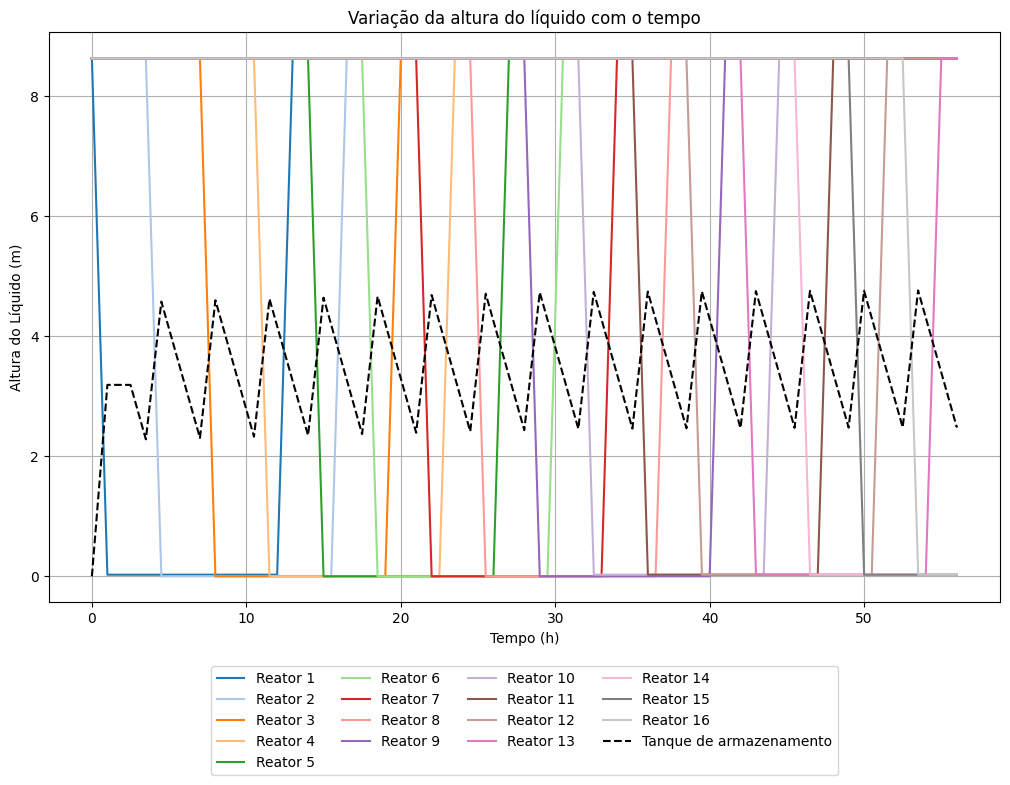

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define colormaps
cmap1 = plt.get_cmap("tab20")  # 20 distinct colors
cmap2 = plt.get_cmap("tab20b")  # Additional 20 distinct colors

# Combine the colors from both colormaps
colors = np.vstack((cmap1(np.linspace(0, 1, 20)), cmap2(np.linspace(0, 1, 20))))
colors = colors[:len(sol_reactors)]  # Ensure we have as many colors as reactors

# Plot the height of each tank over time
plt.figure(figsize=(12, 8))

# Plot for each reactor with different colors from the colormap
for i, sol in enumerate(sol_reactors):
    plt.plot(t / 3600, sol, label=f'Reator {i + 1}', color=colors[i])

# Plot for the storage tank
plt.plot(t / 3600, sol_storage, label='Tanque de armazenamento', linestyle='--', color='black')

# Add labels and legend
plt.xlabel('Tempo (h)')
plt.ylabel('Altura do Líquido (m)')
plt.title('Variação da altura do líquido com o tempo')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=4)
plt.grid(True)

# Adjust layout to make room for the legend
plt.tight_layout(rect=[0, 0, 0.85, 1])

# Display the plot
plt.show()



Downsampling (Opcional)

In [ ]:
# Downsample the arrays by taking every 100th element
downsample_factor = 10

# Downsample the time array
t = t[::downsample_factor]

# Downsample the solution arrays for the reactors
sol_reactors = [sol[::downsample_factor] for sol in sol_reactors]

# Downsample the solution array for the storage tank
sol_storage = sol_storage[::downsample_factor]

Animation of 16 reactores

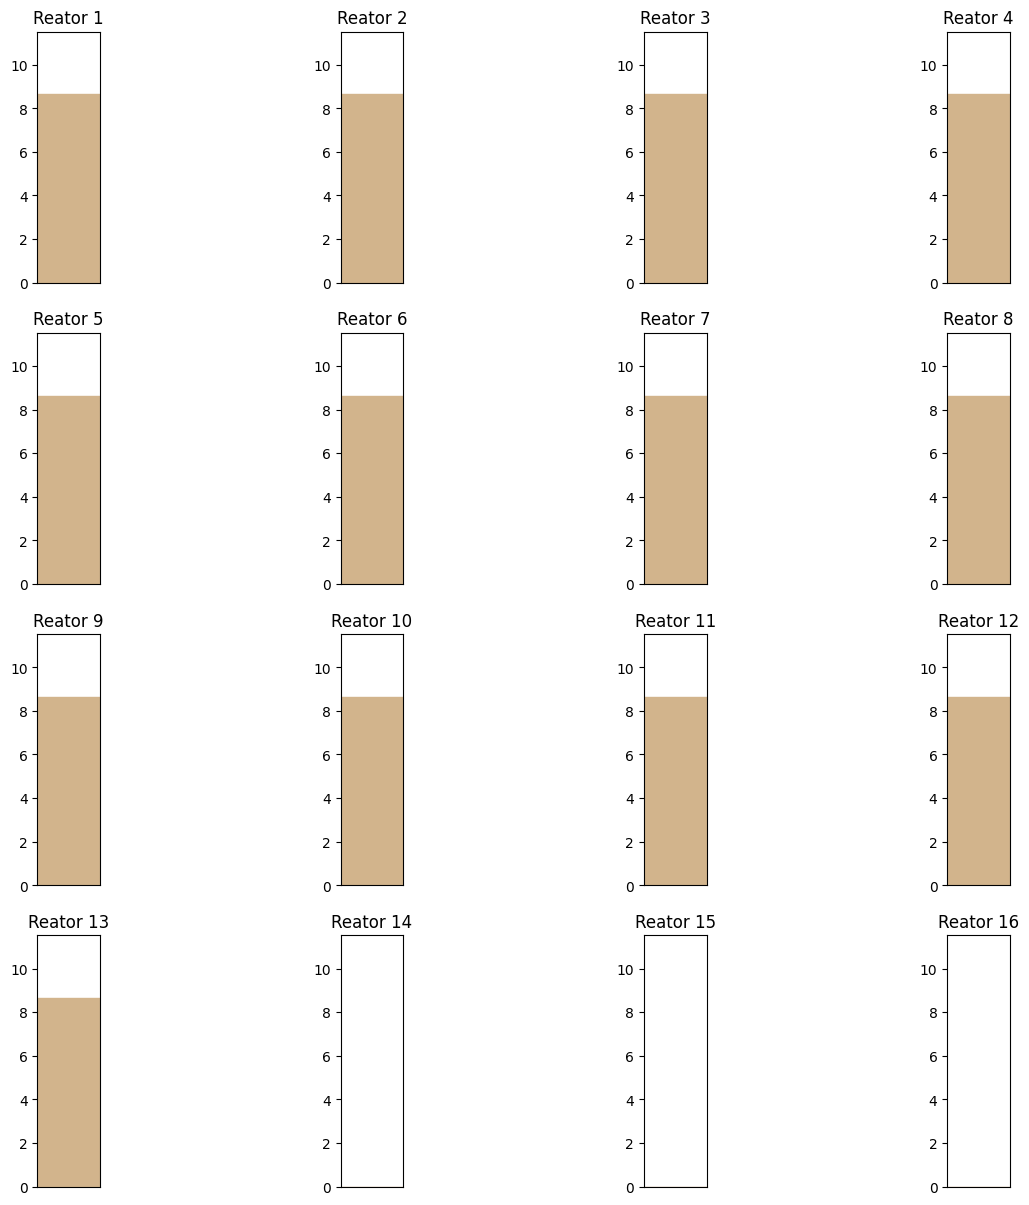

In [ ]:
# Create a figure and axes for the reactors in a 4x4 grid
fig, axes = plt.subplots(4, 4, figsize=(15, 15))
axes = axes.flatten()  # Flatten the 4x4 array of axes

# Define tank parameters for the reactors
tank_params = [{"ax": ax, "diameter": tank_diameter_reactor1, "height": tank_height_reactor1, "fill": None} for ax in axes[:reactor_number]]

# Set axis properties and add titles for the reactors
for i, params in enumerate(tank_params):
    ax = params["ax"]
    ax.set_xlim(0, params["diameter"])
    ax.set_ylim(0, params["height"])
    ax.set_aspect('equal')
    ax.get_xaxis().set_ticks([])
    ax.set_title(f"Reator {i+1}")  # Add title for the reactor

# Initialize time text objects
time_texts = [ax.text(0.02, 0.95, '', transform=ax.transAxes) for ax in axes[:reactor_number]]

# Define initial fills for each tank using tank_params
for params, sol in zip(tank_params, sol_reactors):
    ax = params["ax"]
    fill = ax.fill_between([0, params["diameter"]], 0, sol[0], color='#D2B48C')
    params["fill"] = fill  # Update fill attribute in tank_params
    params["sol"] = sol  # Add the 'sol' key with the corresponding solution array

# Function to update the animation
def animate(frame):
    # Update fills for each tank
    for params in tank_params:
        ax = params["ax"]
        fill = params["fill"]
        fill.remove()  # Remove previous fill
        fill = ax.fill_between([0, params["diameter"]], 0, params["sol"][frame], color='#D2B48C')
        params["fill"] = fill  # Update fill attribute in tank_params

    return [params["fill"] for params in tank_params] + time_texts

# Create the animation
ani = FuncAnimation(fig, animate, frames=len(t), interval=20, blit=True, repeat=False)

# Display the animation in a Jupyter notebook
HTML(ani.to_html5_video())

Animation of one tank

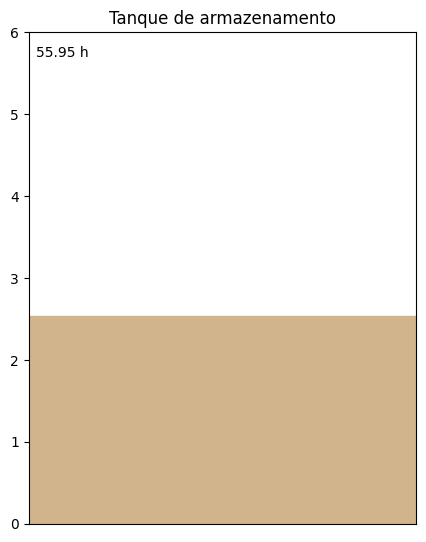

In [ ]:
# Create a figure and axis for the storage tank
fig, ax = plt.subplots(figsize=(5, 10))

# Define tank parameters for the storage tank
tank_params = {"ax": ax, "diameter": tank_diameter_storage, "height": tank_height_storage, "fill": None}

# Set axis properties for the storage tank
ax.set_xlim(0, tank_params["diameter"])
ax.set_ylim(0, tank_params["height"])
ax.set_aspect('equal')
ax.get_xaxis().set_ticks([])
ax.set_title("Tanque de armazenamento")

# Initialize time text object
time_text = ax.text(0.02, 0.95, '', transform=ax.transAxes)

# Define initial fill for the storage tank
fill = ax.fill_between([0, tank_params["diameter"]], 0, sol_storage[0], color='#D2B48C')
tank_params["fill"] = fill  # Update fill attribute in tank_params
tank_params["sol"] = sol_storage  # Add the 'sol' key with the corresponding solution array

# Function to update the animation
def animate(frame):
    # Update fill for the storage tank
    fill = tank_params["fill"]
    fill.remove()  # Remove previous fill
    fill = ax.fill_between([0, tank_params["diameter"]], 0, tank_params["sol"][frame], color='#D2B48C')
    tank_params["fill"] = fill  # Update fill attribute in tank_params

    time = t[frame]/3600

    # Update time text object
    time_text.set_text('%.2f h' % time)

    return [fill, time_text]

# Create the animation
ani = FuncAnimation(fig, animate, frames=len(t), interval=20, blit=True, repeat=False)

# Display the animation in a Jupyter notebook
HTML(ani.to_html5_video())

**Cycle in 1 reactor**

 Simulation

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# Define parameters for the first and third tanks (Reactors 1 and 2)
volume_medium = 56.25
tank_height_reactor1 = 11.52  # m
tank_diameter_reactor1 = 2.88  # m
outflow_rate_reactor1 = 56.25 / 3600  # m³/s (convert from m³/h to m³/s)
inflow_rate_medium = 56.25 / 3600  # m³/s (convert from m³/h to m³/s)
start_emptying_medium = 55 * 3600 # s
start_filling_medium = 10 * 3600 # s
reactor_number = 1
tank_area_reactor1 = np.pi * (tank_diameter_reactor1 / 2) ** 2
medium_height_reactor1 = volume_medium / tank_area_reactor1  # m
liquid_height_reactor1 = 9.2 # m
discharge_diameter = 0.1  # m
discharge_coefficient = 0.98
start_filling_liquid = 0 # s
filling_time_liquid = 12 * 60 # s
nozzle_number = 6
inflow_rate_reactor1 = 0.8414 / 60  # m³/s (convert from m³/min to m³/s)
mixing_time = 8 * 60 # s
discharge_time = 19.3258075070348 * 60 # s

# Set up initial conditions and time grid
t = np.linspace(0, 4*3600, 10000)  # time grid
dt = t[1] - t[0]  # time step

def simulate_reactor_medium(t, dt):
    sol = np.zeros_like(t)
    sol[0] = 0
    for i in range(1, len(t)):
        if t[i] >= start_emptying_medium:
            dh = -outflow_rate_reactor1 / tank_area_reactor1
        elif t[i] >= start_filling_medium:
            dh = inflow_rate_medium / tank_area_reactor1
        else:
            dh = 0

        sol[i] = sol[i - 1] + dh * dt

        if sol[i] < 0:
            sol[i] = 0

        if sol[i] > medium_height_reactor1:
            sol[i] = medium_height_reactor1

    return sol

sol_reactor_medium = simulate_reactor_medium(t, dt)

# Function to evaluate rate of change of liquid height based on Torricelli's law
def dh_dt(h):
    # Calculate the flow rate out of the tank using Torricelli's law
    q_out = discharge_coefficient * np.sqrt(2 * 9.81 * h) * np.pi * (discharge_diameter / 2)**2
    # Calculate the rate of change of liquid height based on conservation of mass
    dh_dt = -q_out / tank_area_reactor1
    return dh_dt

def simulate_reactor_cleaning(t, dt):
    sol = np.zeros_like(t)
    sol[0] = 0
    cycle_cleaning_time = filling_time_liquid + mixing_time + discharge_time
    for i in range(1, len(t)):
        dh_vector = [0]
        for j in range(0,7):
            if start_filling_liquid + cycle_cleaning_time*j >= t[i] >= start_filling_liquid + filling_time_liquid + mixing_time + cycle_cleaning_time*(j-1):
                dh = dh_dt(sol[i-1])
            elif start_filling_liquid + filling_time_liquid + cycle_cleaning_time*(j-1) >= t[i] >= start_filling_liquid + cycle_cleaning_time*(j-1):
                dh = inflow_rate_reactor1 * nozzle_number / tank_area_reactor1
            else:
                dh = 0

            dh_vector.append(dh)

        non_zero_values = [value for value in dh_vector if value != 0]
        if len(non_zero_values) == 1:
            non_zero_value = non_zero_values[0]
            dh = non_zero_value
        else:
            dh = 0

        sol[i] = sol[i - 1] + dh * dt

        if sol[i] < 0:
            sol[i] = 0

        if sol[i] > liquid_height_reactor1:
            sol[i] = liquid_height_reactor1

    return sol

sol_reactor_liquid = simulate_reactor_cleaning(t, dt)

Plot medium and liquid height over time

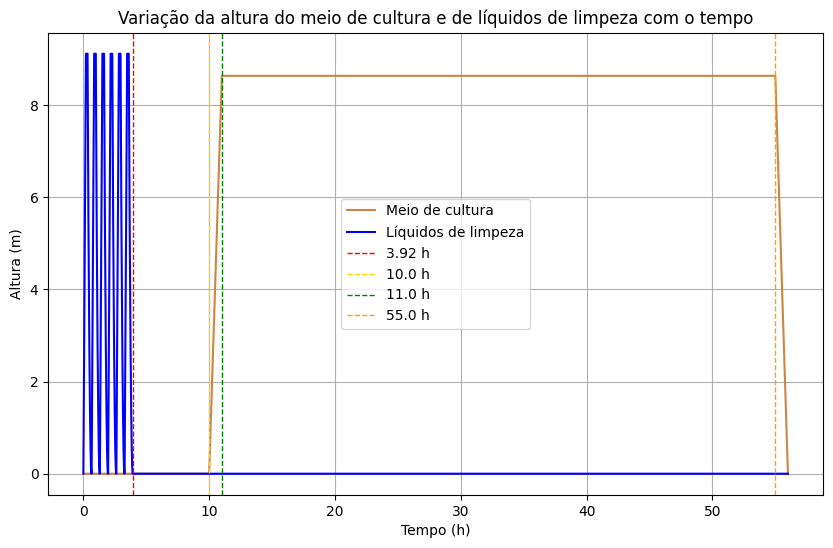

In [ ]:
import matplotlib.pyplot as plt

# Plot the height of reactor medium over time in yellowish brown
plt.figure(figsize=(10, 6))
plt.plot(t/3600, sol_reactor_medium, color='#CD853F', label='Meio de cultura')  # Reactor medium plot
plt.plot(t/3600, sol_reactor_liquid, color='blue', label='Líquidos de limpeza')  # Reactor liquid plot

# Plot vertical lines at specific times
specific_times = [3.92, 10.00, 11.00, 55.00]
colors = ['red', '#FFD700', 'green', 'orange']
for i, time in enumerate(specific_times):
    plt.axvline(x=time, color=colors[i], linestyle='--', linewidth=1, label=f'{time} h')

plt.xlabel('Tempo (h)')
plt.ylabel('Altura (m)')
plt.title('Variação da altura do meio de cultura e de líquidos de limpeza com o tempo')
plt.grid(True)
plt.legend()
plt.show()



Plot liquid height over time in first 4 hours

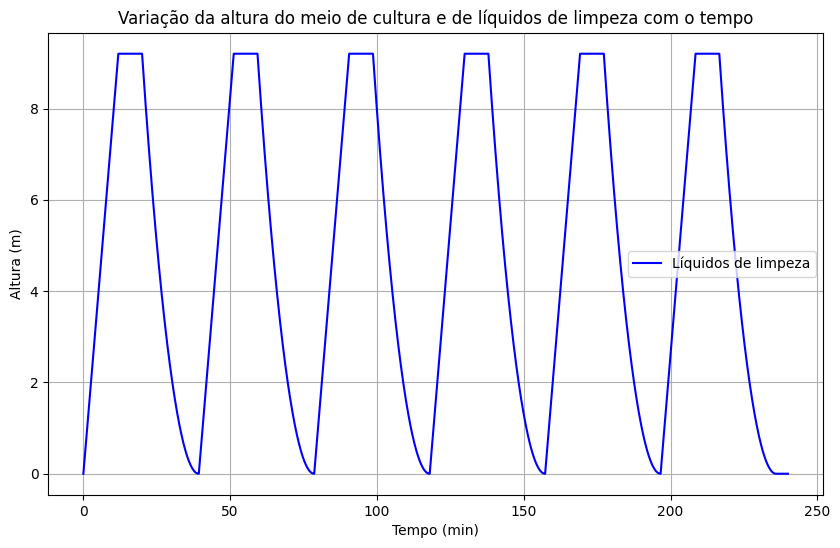

In [ ]:
import matplotlib.pyplot as plt

# Plot the height of reactor medium over time in yellowish brown
plt.figure(figsize=(10, 6))
plt.plot(t/60, sol_reactor_liquid, color='blue', label='Líquidos de limpeza')  # Reactor liquid plot

plt.xlabel('Tempo (min)')
plt.ylabel('Altura (m)')
plt.title('Variação da altura do meio de cultura e de líquidos de limpeza com o tempo')
plt.grid(True)
plt.legend()
plt.show()



Animate reator cycle

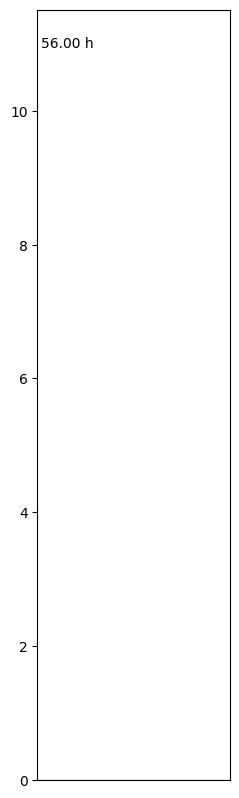

In [ ]:
# Create a figure and axis for the storage tank
fig, ax = plt.subplots(figsize=(5, 10))

# Define tank parameters for the storage tank
tank_params = {"ax": ax, "diameter": tank_diameter_reactor1, "height": tank_height_reactor1, "fill": None}

# Set axis properties for the storage tank
ax.set_xlim(0, tank_params["diameter"])
ax.set_ylim(0, tank_params["height"])
ax.set_aspect('equal')
ax.get_xaxis().set_ticks([])

# Initialize time text object
time_text = ax.text(0.02, 0.95, '', transform=ax.transAxes)

# Define initial fill for the storage tank
fill = ax.fill_between([0, tank_params["diameter"]], 0, sol_reactor_liquid[0], color='#D2B48C')
tank_params["fill"] = fill  # Update fill attribute in tank_params
tank_params["sol"] = sol_reactor_liquid  # Add the 'sol' key with the corresponding solution array

def animate(frame):
    current_time = t[frame] / 3600  # Convert time to hours

    # Determine which solution to use
    if current_time < 5:
        solution = sol_reactor_liquid
        color = 'blue'
    else:
        solution = sol_reactor_medium
        color = '#D2B48C'

    # Update fill for the storage tank
    fill = tank_params["fill"]
    fill.remove()  # Remove previous fill
    fill = ax.fill_between([0, tank_params["diameter"]], 0, solution[frame], color= color)
    tank_params["fill"] = fill  # Update fill attribute in tank_params

    # Update time text object
    time_text.set_text('%.2f h' % current_time)

    return [fill, time_text]

# Create the animation
ani = FuncAnimation(fig, animate, frames=len(t), interval=20, blit=True, repeat=False)

# Display the animation in a Jupyter notebook
HTML(ani.to_html5_video())